In [21]:
using CSV
using DataFrames
using Plots

data = "raisindata.csv" |> CSV.File |> DataFrame
data[:,3:end]

,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
,Float64,Float64,Int64,Float64,Float64,String7
1,253.291,0.819738,90546,0.758651,1184.04,Kecimen
2,243.032,0.801805,78789,0.68413,1121.79,Kecimen
3,266.328,0.798354,93717,0.637613,1208.58,Kecimen
4,208.76,0.684989,47336,0.699599,844.162,Kecimen
5,290.828,0.564011,81463,0.792772,1073.25,Kecimen
6,200.122,0.777351,51368,0.658456,881.836,Kecimen
7,176.131,0.823099,43904,0.665894,823.796,Kecimen
8,235.43,0.706058,62329,0.743598,933.366,Kecimen
9,172.576,0.845499,44743,0.698031,849.728,Kecimen


In [22]:
include("kMeans.jl")
include("seedMeans.jl")

minDist (generic function with 1 method)

In [23]:
classes = data[:,end]

function sortIt(class)
    if class == "Kecimen"
        return(1)
    elseif class == "Besni"
        return(2)
    end
end

classIndexes = map(sortIt,classes)
print()

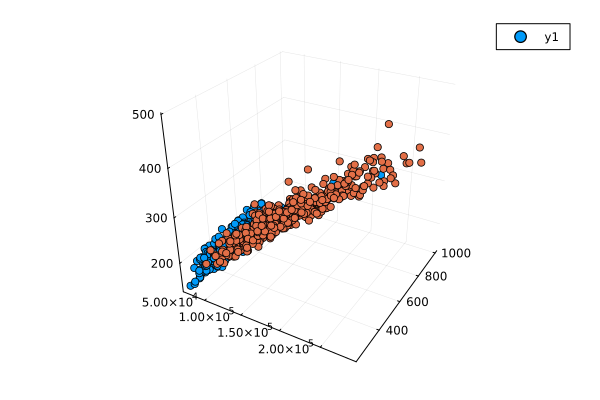

In [24]:
dataPoints = Array(data[:,[1,2,3]])
plot1 = scatter(dataPoints[:,1],dataPoints[:,2],dataPoints[:,3],color = classIndexes)

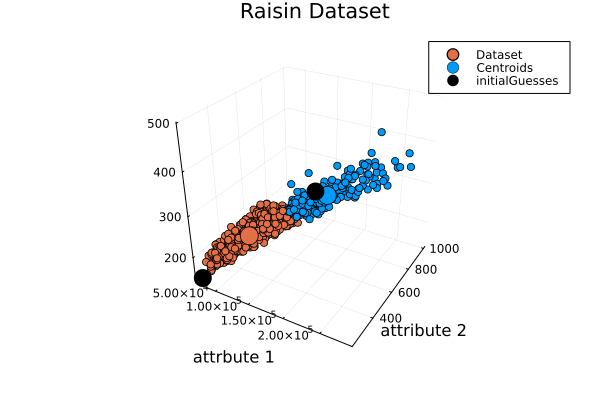

In [29]:
initialMeans = kpMeans(dataPoints,2)
(a,b) = kMeans(dataPoints,initialMeans,0.0000005)

assocs = associateNearestMeans(dataPoints,a)

scatter(dataPoints[:,1],dataPoints[:,2],dataPoints[:,3], color = assocs, xlabel = "attrbute 1", ylabel = "attribute 2", label = "Dataset", markeralpha = 50)
scatter!(a[:,1],a[:,2],a[:,3],color = [1,2], label = "Centroids", markersize = 10, markeralpha = 100, title = "Raisin Dataset")
scatter!(initialMeans[:,1],initialMeans[:,2],initialMeans[:,3],color = "black", label = "initialGuesses", markersize = 10, markeralpha = 100, title = "Raisin Dataset")

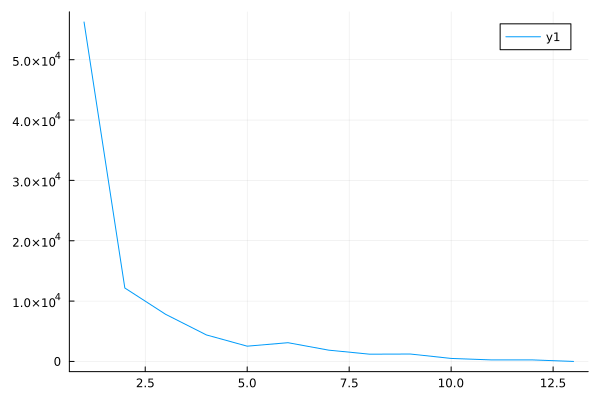

In [31]:
x = size(b)[1]
plot(1:x,b)